## Final Project Submission

Please fill out:
* Student name: Nyokabi Waiganjo
* Student pace: full time
* Scheduled project review date/time: 11th March 2023
* Instructor name: 
* Blog post URL: https://github.com/nyokabi-w/dsc-phase-1-project-v2-4/blob/master/student.ipynb


# MICROSOFT  ANALYSIS.

![Microsoft hollywood](microsoft_1.jpg)

## Project Overview

The projects aims at using exploratory data analysis. we will identify the relevant data we need from the available datasets, clean the data, then use descriptive analysis to analyse the data. The outcome from our analysis to generate meaningful insights that microsoft will use to make calculated business moves. 


## Business Problem

Microsoft has looked at the movie making market and has seen a business opportunity. They are seeking to create a new studio for movie productions. Since microsoft is new to the film making industry we will look at which genre of films are currently doing well so that microsoft can know which films to create. 

## Data Understanding

Since microsoft wants to join the film making industry it doesnt have data of its own. We are using data that was collected from various locations. The data collected includes movie ratings and movie basics that are associated with movie ids. The datasets provides alot of information that includes domestic and foreign gross, movie budgets and the genres of movies.

### Importing Libraries

In [6]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlite3

#  Movie Budget Data.

Data cleaning for the movie budget movies dataset. The cleaning will include checking for missing values and duplicate values. Depending on the number of values missing we might drop either the rows containing the missing values or group the entire column if the missing values are too many. For the duplicates we will keep the first row and drop the rest of the duplicates. since the data has no missing values we are working with duplicates.

In [7]:
# importing movie budget data
tn_movies = pd.read_csv("tn.movie_budgets.csv" , index_col = 0)

In [8]:
tn_movies

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"


## Cleaning Movie Budget data

Data cleaning for the movie budget movies dataset. The cleaning will include checking for missing values and duplicate values. Depending on the number of values missing we might drop either the rows containing the missing values or group the entire column if the missing values are too many. For the duplicates we will keep the first row and drop the rest of the duplicates. since the data has no missing values we are working with duplicates.

In [9]:
# looking for missing data
tn_movies .isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [10]:
# looking for duplicates
tn_movies .duplicated().sum()

0

In [11]:
tn_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [12]:
# dropping dollar signs and commas
tn_movies ['production_budget'] = tn_movies ['production_budget'].str.replace('$', "").str.replace(',',"").astype(float)
tn_movies['domestic_gross']= tn_movies['domestic_gross'].str.replace('$', "").str.replace(',',"").astype(float)
tn_movies['worldwide_gross']= tn_movies['worldwide_gross'].str.replace('$', "").str.replace(',',"").astype(float)
tn_movies .head()

C:\Users\NYOKS\AppData\Local\Temp\ipykernel_11588\476922719.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tn_movies ['production_budget'] = tn_movies ['production_budget'].str.replace('$', "").str.replace(',',"").astype(float)
C:\Users\NYOKS\AppData\Local\Temp\ipykernel_11588\476922719.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tn_movies['domestic_gross']= tn_movies['domestic_gross'].str.replace('$', "").str.replace(',',"").astype(float)
C:\Users\NYOKS\AppData\Local\Temp\ipykernel_11588\476922719.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be tre

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [13]:
#dropping column
tn_movies.drop(["release_date"], axis = 1 , inplace = True)

In [14]:
# creating return investment column
tn_movies ["return_investment"]= ((tn_movies['domestic_gross'] + tn_movies['worldwide_gross'] - tn_movies['production_budget']) / tn_movies['production_budget']).round(2)

In [15]:
# sorting data and removing outliers
tn_movies_sorted = tn_movies.sort_values(by = 'return_investment', ascending= False).head(20).iloc[1:20]
tn_movies_sorted

,movie,production_budget,domestic_gross,worldwide_gross,return_investment
id,,,,,
93,Paranormal Activity,450000.0,107918810.0,194183034.0,670.34
7,The Blair Witch Project,600000.0,140539099.0,248300000.0,647.07
80,The Gallows,100000.0,22764410.0,41656474.0,643.21
74,El Mariachi,7000.0,2040920.0,2041928.0,582.26
14,Mad Max,200000.0,8750000.0,99750000.0,541.50
10,Super Size Me,65000.0,11529368.0,22233808.0,518.43
47,Bambi,858000.0,102797000.0,268000000.0,431.16
16,The Brothers McMullen,50000.0,10426506.0,10426506.0,416.06
66,The Texas Chainsaw Massacre,140000.0,26572439.0,26572439.0,378.61


# Bom Movie Gross Data

Data cleaning for our movies dataset bom movie gross. The cleaning will include checking for missing values and duplicate values. Depending on the number of values missing we might drop either the rows containing the missing values or group the entire column if the missing values are too many. For the duplicates we will keep the first row and drop the rest of the duplicates. The data has no duplicates but has missing values so we will work on grouping the missing columns or rows.

In [16]:
#importing bom gross data
bom_movies = pd.read_csv("bom.movie_gross.csv")

In [17]:
bom_movies.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [18]:
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


## Data Cleaning For Bom Movies

In [19]:
#looking for missing values
bom_movies.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [20]:
bom_movies.isna().sum()/len(bom_movies)

title             0.000000
studio            0.001476
domestic_gross    0.008267
foreign_gross     0.398583
year              0.000000
dtype: float64

In [21]:
#looking for duplicates
bom_movies.duplicated().sum()

0

In [22]:
# dropping foreign gross column
bom_movies.drop(["foreign_gross"], axis =1 , inplace = True)

In [23]:
bom_movies

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


In [24]:
# dropping rows with missing studio values
bom_movies.dropna(subset =["studio"], axis = 0 , inplace = True)

In [25]:
# looking for missing values
bom_movies.isna().sum()

title              0
studio             0
domestic_gross    26
year               0
dtype: int64

In [26]:
# dropping rows with missing domestic gross values
bom_movies.dropna(subset =["domestic_gross"], axis = 0 , inplace = True)

In [27]:
bom_movies.isna().sum()

title             0
studio            0
domestic_gross    0
year              0
dtype: int64

In [28]:
# changing year to date format
bom_movies["year"] = pd.to_datetime(bom_movies["year"])

In [29]:
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           3356 non-null   object        
 1   studio          3356 non-null   object        
 2   domestic_gross  3356 non-null   float64       
 3   year            3356 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 131.1+ KB


#  IMDB Data

In [30]:
#defining conn
conn = sqlite3.connect('im.db')

In [31]:
imdb_data1 = pd.read_sql(""" select * from movie_ratings""" , conn)

In [32]:
imdb_data1

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [33]:
imdb_data2 = pd.read_sql(""" select * from movie_basics""" , conn)
imdb_data2

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [34]:
# Joining Tables
imdb_data =pd.read_sql(""" SELECT primary_title, start_year, genres, averagerating, numvotes
FROM movie_basics AS MB
JOIN movie_ratings AS MR
ON MB.movie_id = MR.movie_id
WHERE numvotes > 1000000 AND averagerating BETWEEN 6.8 AND 9.2
ORDER BY averagerating DESC
LIMIT 50; """, conn)

imdb_data.head()


,primary_title,start_year,genres,averagerating,numvotes
0,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066
1,Interstellar,2014,"Adventure,Drama,Sci-Fi",8.6,1299334
2,The Dark Knight Rises,2012,"Action,Thriller",8.4,1387769
3,Django Unchained,2012,"Drama,Western",8.4,1211405
4,The Wolf of Wall Street,2013,"Biography,Crime,Drama",8.2,1035358


In [35]:
grouped = imdb_data.groupby('genres')
grouped.get_group('Action,Adventure,Sci-Fi')

,primary_title,start_year,genres,averagerating,numvotes
0,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066
6,The Avengers,2012,"Action,Adventure,Sci-Fi",8.1,1183655


In [36]:
genres_mean_sorted = pd.DataFrame(imdb_data.groupby("genres")["numvotes"].mean()).sort_values(by="numvotes", ascending= False)
genres_mean_sorted

,numvotes
genres,
"Action,Adventure,Sci-Fi",1512360.5
"Action,Thriller",1387769.0
"Adventure,Drama,Sci-Fi",1299334.0
"Drama,Western",1211405.0
"Biography,Crime,Drama",1035358.0
"Mystery,Thriller",1005960.0


In [37]:
genres_mean_sorted = pd.DataFrame(imdb_data.groupby("genres")["numvotes"].mean()).sort_values(by="numvotes", ascending= False).iloc[:10]
genres_mean_sorted

,numvotes
genres,
"Action,Adventure,Sci-Fi",1512360.5
"Action,Thriller",1387769.0
"Adventure,Drama,Sci-Fi",1299334.0
"Drama,Western",1211405.0
"Biography,Crime,Drama",1035358.0
"Mystery,Thriller",1005960.0


# ANALYSIS. 

# Studio and Domestic Gross

After cleaning our data we want to performing analysis. For analysis we are looking at the which studios are doing well and producing better films. We will also look at which studios are going to be a competition for our microsoft studio. We are going to group our bom_movies dataset and group using studio and gross and plot a histogram to show the average domestic gross for the 10 top most studios. 

In [38]:
# grouping data by studio and domestic gross
bom_movies_grouped = bom_movies.groupby('studio')["domestic_gross"].mean()

In [39]:
# df dataframe
movies_grouped = pd.DataFrame(bom_movies_grouped)
movies_grouped

,domestic_gross
studio,
3D,6.100000e+06
A23,8.210000e+04
A24,6.616208e+06
ADC,1.241000e+05
AF,3.571500e+05
...,...
XL,2.290000e+05
YFG,1.100000e+06
Yash,2.433185e+06


In [40]:
# sorting grouped data
Grouped_movies = movies_grouped.sort_values(by = ["domestic_gross"], ascending = False)

In [41]:
topmost_studios = Grouped_movies.head(10)
topmost_studios

,domestic_gross
studio,
BV,1.737644e+08
P/DW,1.682900e+08
WB (NL),8.879333e+07
Uni.,8.777138e+07
WB,8.691461e+07
Fox,8.051103e+07
Sony,7.761177e+07
Par.,7.609773e+07
MGM,6.666667e+07


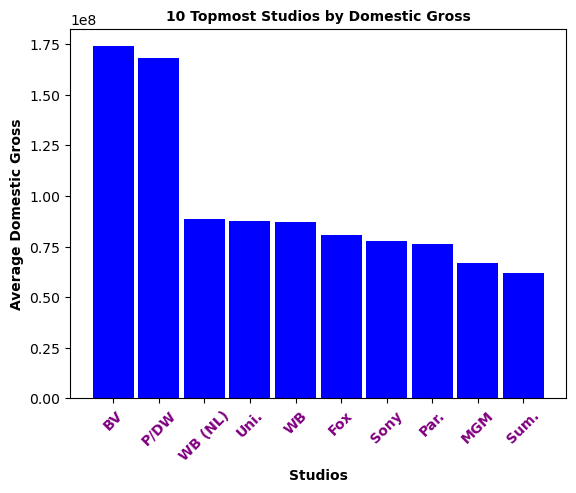

In [42]:
# plotting histogram
plt.bar(topmost_studios["domestic_gross"].index, topmost_studios["domestic_gross"].values, color="blue" , width = 0.9)
plt.xticks(rotation = 45 , fontsize = 10 , fontweight = "bold" , color = "purple")
plt.xlabel("Studios" , fontsize = 10 , fontweight = "bold")
plt.ylabel("Average Domestic Gross", fontsize = 10 , fontweight = "bold")
plt.title("10 Topmost Studios by Domestic Gross", fontsize = 10 , fontweight = "bold")
plt.gcf().set_size_inches = "9 ,8"
plt.show()

### Explanation
Looking at the top 10 studios that are producing movies we find that at the top is BV whos domesting gross is averaging at 1.73m while at P/DW is averaging at 1.68m at second position. Most of the studios are averaging between 6 and 8m. For microsoft to be the best film producing studio they will look forward to competing with BV studios and P/DW studios. Microsoft can learn from BV and P/DW studios and discover what makes them the best studios with the highest averaging domestic gross.  


# Return Investments and Production Budget

We are performing analysis for the movie budget dataset. For analysis we are looking at the production cost which we are going to compare with the return investment. We want to see if there is a linear relationship between the production budget of the movie and the return on investment. To compare the two we will draw a line graph. 
 
  

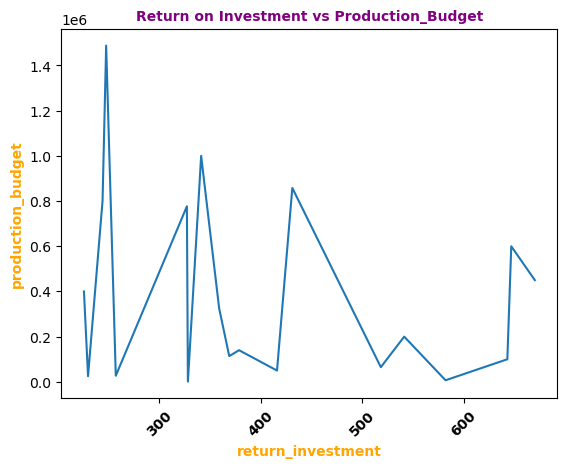

In [46]:
#plotting bar graph
x = tn_movies_sorted['return_investment']
y = tn_movies_sorted['production_budget']
plt.plot(x,y)
plt.xticks(rotation = 45 , fontsize = 10 , fontweight = "bold" )
plt.xlabel("return_investment" , fontsize = 10 , fontweight = "bold" ,  color = "orange")
plt.ylabel("production_budget", fontsize = 10 , fontweight = "bold" ,  color = "orange" )
plt.title("Return on Investment vs Production_Budget", fontsize = 10 , fontweight = "bold", color = "Purple")
plt.gcf().set_size_inches = "9 ,8"
plt.show()




### Explanation
For this analysis we looked at the return investment aganist the production budget. According to the line graph we can clearly see that there is no linear relationship between the movie production budget and the profit made from the movies. Microsoft should look at other ways to make a movie successful rather than having a big production budget. 

# Genre and Numvotes

For this analysis we are looking for the genre which has the most votes. Our data is grouped by genre and numvotes this will tell us which movie genre has the most votes. For this analysis we draw a figure that clearly depicts the studios with the number of votes that they acquired. 

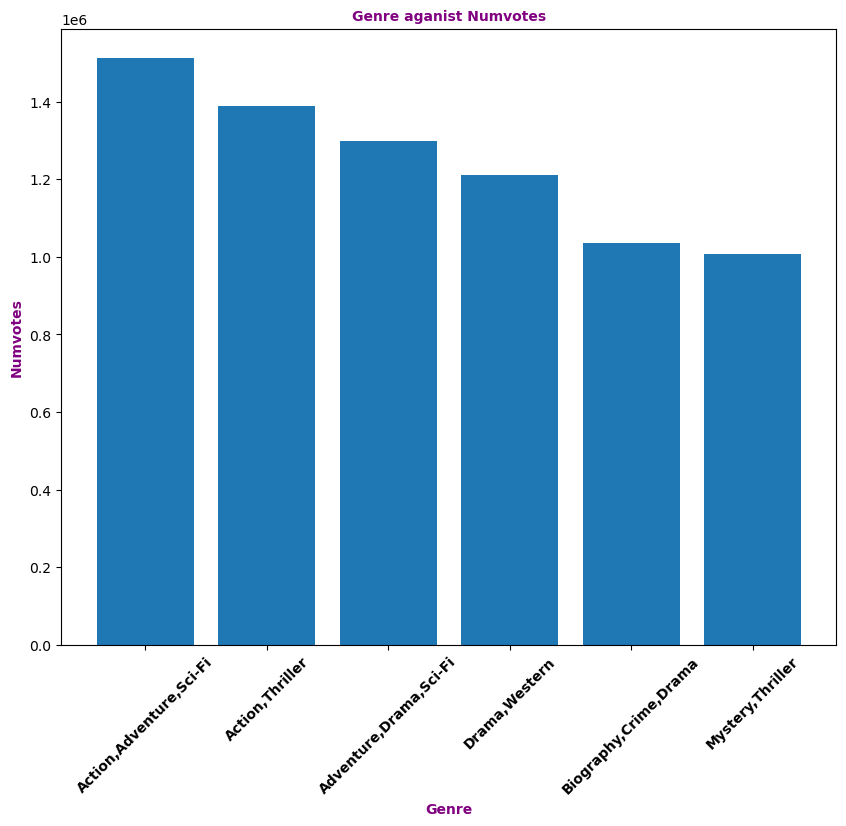

In [45]:
#plotting the graph
plt.figure(figsize=(10, 8))
y = genres_mean_sorted["numvotes"]
plt.bar(y.index, y.values)
plt.xticks(rotation = 45 , fontsize = 10 , fontweight = "bold")
plt.xlabel("Genre" , fontsize = 10 , fontweight = "bold", color = "purple")
plt.ylabel("Numvotes", fontsize = 10 , fontweight = "bold" ,  color = "purple")
plt.title("Genre aganist Numvotes", fontsize = 10 , fontweight = "bold" , color = "purple")
plt.gcf().set_size_inches = "9 ,8"
plt.show()



### Explanation
For this analysis we have looked at the genre movies aganist the number of votes. According to the graph action,adventure,sci-fi is the most streamed movie as it acquired the most votes averaging at 1512360 votes. Action and thriller movies are the second most streamed movies with 1387769 votes. The least watched genre was mystery and thriller with 1005960 votes. Microsoft may consider producing more action,adventure,sci-fi movies as they are the most watched and they can also double down on action and thriller without excluding the other genres as they average between 1m and 1.3m votes which is still high. 

## Conclusions

This analysis leads to three recommendations that Microsoft should consider when creating their new studio:
1. Microsoft should do more research and learn from BV and P/DW studios and discover what makes them the best studios with the highest averaging domestic gross.
2. Microsoft should look at other ways to make a movie successful rather than having a big production budget. since theres no correlation between the budget and the movies success microsoft can consider looking for good script writers, directors , actors and quality videos for the success of the movies.
3. Microsoft may consider producing more action,adventure,sci-fi movies as they are the most watched and they can also double down on action and thriller without excluding the other genres.
    
    
    
    

## Next Step

More research and further analysis could be helpful in yielding additional insights that Microsoft would use when setting up their studio. They should focus on gaining insights and familiarity for later investigation. 
1. Predicting undesirable outcomes- this models could help microsoft to be prepared they should consider investigating possible negative outcomes that can occur so that they can look for ways to overcome them.
2. Modelling for qualified personnel- Modelling how impactful having qualified personnel could help in realising what makes movies successful since we so there no linear relationship between production budget and the success of the movie
3. More and better predictions on the genre of movies that that are a success - the models would give more insights on the kind of movies that the studio could focus on.


### Thank you 
Nyokabi Waiganjo
waiganjo.s.nyokabi@gmail.com
